In [75]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [76]:
data = {'edad': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 91],
        'salario': [30000, 35000, 40000, 45000, 50000, 55000, 57000, 65000, 70000, 75000, 60000, 55000, 40000, 35000, 40000]}
df = pd.DataFrame(data)


In [ ]:
X = df['edad'].values.reshape(-1, 1)
y = df['salario'].values

# Define el grado del polinomio
degree = 2

# Transforma las características a términos polinómicos
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42)

# Ajusta el modelo de regresión lineal a las características polinómicas
model = LinearRegression()
model.fit(X_train, y_train)


In [78]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 106440555.86303353


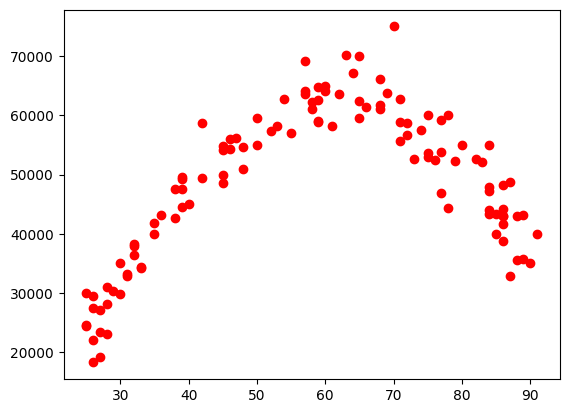

In [79]:
num_samples = 100
min_age = df['edad'].min()
max_age = df['edad'].max()


np.random.seed(42)
random_ages = np.random.randint(min_age, max_age + 1, size=num_samples).reshape(-1, 1)
random_ages_poly = poly_features.transform(random_ages)
predicted_salaries = model.predict(random_ages_poly)
noise_std_dev = 4000  # Ajusta la desviación estándar del ruido según sea necesario
noise = np.random.normal(0, noise_std_dev, size=num_samples)
predicted_salaries_noisy = predicted_salaries + noise

synthetic_data = pd.DataFrame({'edad': random_ages.flatten(), 'salario': predicted_salaries_noisy})
combined_data = pd.concat([df, synthetic_data], ignore_index=True)



X=combined_data['edad']
y=combined_data['salario']
plt.plot(X, y, 'ro')